## Libraries

In [1]:
import tempfile
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

Equilibrium Reached at Temp=287.09. At time=22.0
Final Temp(K): 288.0
Final Temp(C): 15



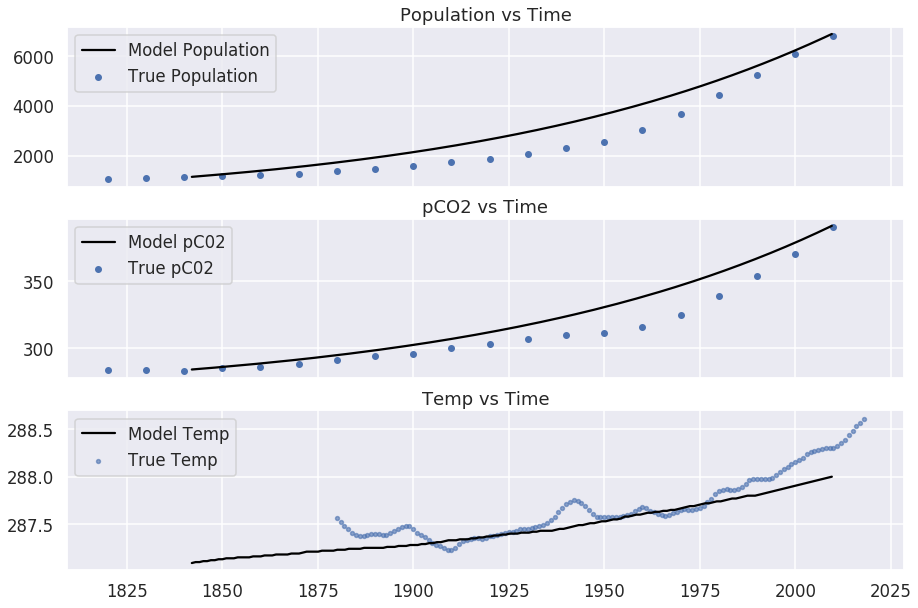

In [2]:
nameList = makeDefNamelist() #make namelist
nameList['ebm']['lverbose']=True #controls terminal output, used for debugging
nameList['ebm']['runTime'] = 190#change runtime
nameList['ebm']['rBirth']=.0252;
nameList['ebm']['rDeath']=.0142857;
nameList['ebm']['rco2']=2.00e-4;

#change distance
newA = 1#AU
nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux

#change pco2
newPco2=284#ppm
nameList['ebm']['pco20']=newPco2/10**6

#run the progra,
dfModel, finalavgtemp, eqTime, eqTemp = runProgram("driver.exe",nameList)

#-----------------------------------PLOTS----------------------------------------------------------
dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#plotModelInput(nameList)#plot the temperature dependence on the growth rate
#plotModelOutput(dfModel,newA,eqTime,eqTemp)#plot the output of our model, colored by pco2 
#plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data